<a href="https://colab.research.google.com/github/jhonitay4376/Sentiment-Analyst-Bitcoin/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SKRIPSI/Tweets_Bitcoin_april-jun_2024.csv", encoding='latin-1')

# **Preprocessing**

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
pd.set_option('display.width', 100)
df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1774624163099279626,Mon Apr 01 02:25:46 +0000 2024,1135.0,We're live with #Bitcoin trading on Backpack E...,1.774624e+18,https://pbs.twimg.com/media/GKCwlSvb0AAmKj2.jpg,NaN,en,NaN,50.0,170.0,218.0,https://x.com/Backpack/status/1774624163099279626,1.498030e+18,Backpack
1,1774836257039778075,Mon Apr 01 16:28:33 +0000 2024,629.0,As the bull approaches remember to keep an eye...,1.774836e+18,https://pbs.twimg.com/ext_tw_video_thumb/15416...,NaN,en,This Hill,9.0,87.0,60.0,https://x.com/denverbitcoin/status/17748362570...,1.025968e+18,denverbitcoin
2,1774605348214603935,Mon Apr 01 01:11:00 +0000 2024,17601.0,50 000 BTC offer for a 2-bedroom apartment in ...,1.774605e+18,https://pbs.twimg.com/ext_tw_video_thumb/17745...,NaN,en,NaN,248.0,437.0,1197.0,https://x.com/historyinmemes/status/1774605348...,8.554820e+17,historyinmemes
3,1774770609743860129,Mon Apr 01 12:07:41 +0000 2024,3391.0,Bitcoin provides hope &amp; protection for any...,1.774771e+18,https://pbs.twimg.com/amplify_video_thumb/1774...,NaN,en,New York City,73.0,281.0,583.0,https://x.com/APompliano/status/17747706097438...,3.390615e+08,APompliano
4,1774948061246021807,Mon Apr 01 23:54:34 +0000 2024,4.0,@ZssBecker what games are good in crypto thoug...,1.774949e+18,https://pbs.twimg.com/ext_tw_video_thumb/17749...,ZssBecker,en,The City of Gold,0.0,1.0,2.0,https://x.com/GetPaidMore/status/1774948500037...,1.262978e+18,GetPaidMore


In [ ]:
kolom = ['created_at', 'full_text','lang']
df=df[kolom]

In [ ]:
print(df)

                           created_at                                          full_text lang
0      Mon Apr 01 02:25:46 +0000 2024  We're live with #Bitcoin trading on Backpack E...   en
1      Mon Apr 01 16:28:33 +0000 2024  As the bull approaches remember to keep an eye...   en
2      Mon Apr 01 01:11:00 +0000 2024  50 000 BTC offer for a 2-bedroom apartment in ...   en
3      Mon Apr 01 12:07:41 +0000 2024  Bitcoin provides hope &amp; protection for any...   en
4      Mon Apr 01 23:54:34 +0000 2024  @ZssBecker what games are good in crypto thoug...   en
...                               ...                                                ...  ...
14234  Mon Jul 01 12:58:27 +0000 2024  #BTC'de spot satÃÂ±ÃÂ emirleri tekrar artma...   tr
14235  Mon Jul 01 08:49:55 +0000 2024  #BTC/ USDT gÃÂ¼ncel MayÃÂ±s ayÃÂ±nÃÂ±n baÃ...   tr
14236  Mon Jul 01 07:04:11 +0000 2024  #bitcoin Quelqu'un a achetÃÂ© 7 735 bitcoin d...   fr
14237  Mon Jul 01 09:46:23 +0000 2024  Der deutsche Staat ta

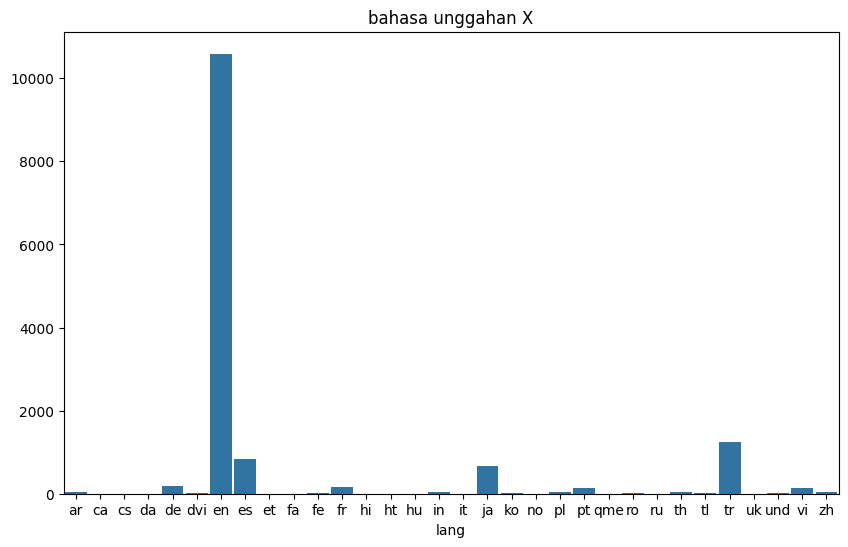

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
result = df.groupby(['lang']).size()
sns.barplot(x = result.index, y = result.values, width=0.9)
plt.title('bahasa unggahan X')
plt.show()

In [ ]:
no_english = df[df['lang'] != 'en']
print(f'jumlah unggahan dengan bahasa selain bahasa inggris : {len(no_english)}')

jumlah unggahan dengan bahasa selain bahasa inggris : 3649


In [ ]:
# menghapus tweets yang bukan termasuk bahasa inggris
df = df[df['lang'] == 'en']

In [ ]:
print(df)

                           created_at                                          full_text lang
0      Mon Apr 01 02:25:46 +0000 2024  We're live with #Bitcoin trading on Backpack E...   en
1      Mon Apr 01 16:28:33 +0000 2024  As the bull approaches remember to keep an eye...   en
2      Mon Apr 01 01:11:00 +0000 2024  50 000 BTC offer for a 2-bedroom apartment in ...   en
3      Mon Apr 01 12:07:41 +0000 2024  Bitcoin provides hope &amp; protection for any...   en
4      Mon Apr 01 23:54:34 +0000 2024  @ZssBecker what games are good in crypto thoug...   en
...                               ...                                                ...  ...
10789  Mon Jul 01 23:53:22 +0000 2024  If you're on here any your profile says anythi...   en
10790  Mon Jul 01 23:59:21 +0000 2024   How could anyone vote for them especially aft...   en
10791  Mon Jul 01 05:03:18 +0000 2024  Long lower shadow shows buyers stepped in to p...   en
10792  Mon Jul 01 23:51:53 +0000 2024  #BTC sell wall is off

In [ ]:
print(f'jumlah unggahan setelah dibersihkan dari ungahan tidak berbahsa inggris : {len(df)}')

jumlah unggahan setelah dibersihkan dari ungahan tidak berbahsa inggris : 10590


<Axes: xlabel='lang'>

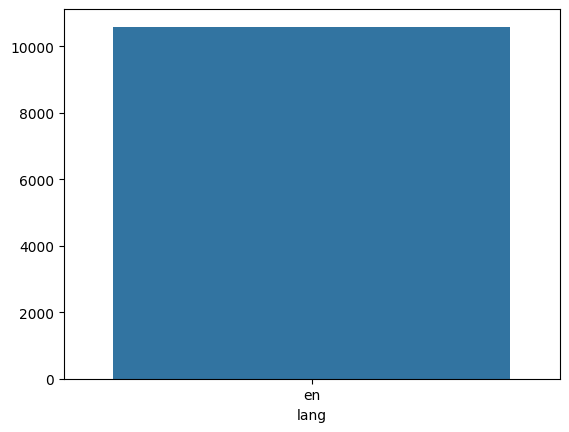

In [ ]:
import seaborn as sns
result = df.groupby(['lang']).size()
sns.barplot(x = result.index, y = result.values)

### **Duplikat**

In [ ]:
# Menghapus baris duplikat berdasarkan kolom 'full_text'
print(f"jumlah data tweets sebelum penangan data duplikat = {len(df)}")
df = df.drop_duplicates(subset='full_text', keep='first')  # `keep` menentukan baris yang disimpan (default: 'first')
print(f"jumlah data tweets setelah penangan data duplikat = {len(df)}")

jumlah data tweets sebelum penangan data duplikat = 10590
jumlah data tweets setelah penangan data duplikat = 10590


### **Pembersihan**

In [ ]:
import re
import string

# Fungsi untuk membersihkan teks
def clean_text(text):
    # 1. Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 2. Hapus Mention (@username)
    text = re.sub(r'@\w+', '', text)

    # 3. Hapus Hashtag (#hashtag tanpa menghapus teksnya)
    text = re.sub(r'#', '', text)

    # 4. Hapus Tanda Baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Hapus Spasi Berlebih
    text = ' '.join(text.split())

    # 6 case folding
    text = text.lower()

    return text
# Terapkan fungsi pada kolom full_text
df['cleanText'] = df['full_text'].apply(clean_text)

In [ ]:
kolom = ['created_at','lang','cleanText']
df=df[kolom]
print(df)

                           created_at lang                                          cleanText
0      Mon Apr 01 02:25:46 +0000 2024   en  were live with bitcoin trading on backpack exc...
1      Mon Apr 01 16:28:33 +0000 2024   en  as the bull approaches remember to keep an eye...
2      Mon Apr 01 01:11:00 +0000 2024   en  50 000 btc offer for a 2bedroom apartment in n...
3      Mon Apr 01 12:07:41 +0000 2024   en  bitcoin provides hope amp protection for anyon...
4      Mon Apr 01 23:54:34 +0000 2024   en  what games are good in crypto though none harr...
...                               ...  ...                                                ...
10789  Mon Jul 01 23:53:22 +0000 2024   en  if youre on here any your profile says anythin...
10790  Mon Jul 01 23:59:21 +0000 2024   en  how could anyone vote for them especially afte...
10791  Mon Jul 01 05:03:18 +0000 2024   en  long lower shadow shows buyers stepped in to p...
10792  Mon Jul 01 23:51:53 +0000 2024   en  btc sell wall is

### **Tokenisasi dan stopword removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# stopword removal
def remove_stopwords(text):
    # Tokenisasi dan menghapus stopwords
    words = text.split()  # Tokenisasi per kata
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Terapkan stopword removal pada kolom 'cleanText'
df['cleanText'] = df['cleanText'].apply(remove_stopwords)

# Tampilkan hasil
print(df)


                           created_at lang                                          cleanText
0      Mon Apr 01 02:25:46 +0000 2024   en             live bitcoin trading backpack exchange
1      Mon Apr 01 16:28:33 +0000 2024   en  bull approaches remember keep eye overzealous ...
2      Mon Apr 01 01:11:00 +0000 2024   en  50 000 btc offer 2bedroom apartment new york t...
3      Mon Apr 01 12:07:41 +0000 2024   en  bitcoin provides hope amp protection anyone us...
4      Mon Apr 01 23:54:34 +0000 2024   en  games good crypto though none harrypotterobama...
...                               ...  ...                                                ...
10789  Mon Jul 01 23:53:22 +0000 2024   en  youre profile says anything bitcoin thats queu...
10790  Mon Jul 01 23:59:21 +0000 2024   en  could anyone vote especially disgraceful slap ...
10791  Mon Jul 01 05:03:18 +0000 2024   en  long lower shadow shows buyers stepped protect...
10792  Mon Jul 01 23:51:53 +0000 2024   en  btc sell wall of

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.models import load_model
import joblib

# Memuat tokenizer yang sudah disimpan
tokenizer = joblib.load('/content/drive/MyDrive/SKRIPSI/Final/Model_T|2,4_Acc97_val_acc95_Loss38_Val_Loss29_e18_Split90-10_Pad15_Dim300_Batch64_Adam_Dense256-128.pkl')

In [ ]:
df['cleanText'] = [str(item) for item in df['cleanText']]

In [ ]:
# mengubah text menjadi angka (sequence)
sequences = tokenizer.texts_to_sequences(df['cleanText'])

In [ ]:
print(sequences)

[[148, 2, 26, 1, 71], [246, 654, 705, 143, 1551, 1, 5796, 21, 1, 6547, 406, 5362, 850, 386, 2], [1, 1, 3, 1044, 1, 12800, 29, 3024, 2224, 1], [2, 2043, 65, 21, 2780, 496, 2482, 196, 824, 1, 3244, 433, 1, 247, 2, 3095, 1, 697, 392, 680, 140, 3953, 465, 11179, 500], [751, 16, 4, 1081, 2335, 1], [2, 782, 897, 388, 667, 1022, 534], [3221, 2, 3, 1, 1], [2455, 2, 400, 1033, 1275, 242], [1607, 2, 44, 1, 223], [2, 388, 222, 66, 2771, 528, 10027, 3, 3], [2, 986, 1849, 114, 45, 76], [2, 1825, 3031, 1632, 975, 131, 2705], [2450, 1, 42, 2450, 2], [332, 721, 151, 115, 2116, 1108, 418, 576, 422, 13634, 1, 1, 2026, 1, 3], [2304, 2, 2970, 1695, 1131, 263, 1406, 2574, 246, 24, 6516, 9601], [4992, 66, 1021, 11651, 2, 842], [3462, 901, 385, 414, 3187, 2, 1, 280], [1, 76, 3641, 1, 2], [2, 1224, 3, 5927, 3307, 2467, 1, 519, 1, 1196, 222, 153, 1022, 881, 2951, 2771, 3999, 2366, 138, 30, 902, 1855, 1974, 122, 97, 1227], [2, 1435, 6824, 1708, 1, 667, 301, 1022, 3079, 30, 937], [2, 5446, 1, 82], [1, 2744, 2256

In [ ]:
# Pastikan semua nilai di 'cleanText' adalah string, dan ubah NaN menjadi string kosong
df['cleanText'] = df['cleanText'].fillna('').astype(str)

# Menghitung jumlah kata
df['word_count'] = df['cleanText'].apply(lambda x: len(x.split()))

average_word_count = df['word_count'].mean()
print(f"Mean jumlah kata pada setiap teks  : {average_word_count}")

modes = df['word_count'].mode()
print(f"Modus jumlah kata pada setiap teks : {modes[0]}")

Mean jumlah kata pada setiap teks  : 14.357034938621341
Modus jumlah kata pada setiap teks : 6


In [ ]:
df1=df

In [ ]:
df=df1

### Padding

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=20)

In [ ]:
df['tokenized'] = list(padded_sequences)

In [ ]:
pd.set_option('display.width', 1000)
print(df)

                           created_at lang                                          cleanText  word_count                                          tokenized
0      Mon Apr 01 02:25:46 +0000 2024   en             live bitcoin trading backpack exchange           5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1      Mon Apr 01 16:28:33 +0000 2024   en  bull approaches remember keep eye overzealous ...          15  [0, 0, 0, 0, 0, 246, 654, 705, 143, 1551, 1, 5...
2      Mon Apr 01 01:11:00 +0000 2024   en  50 000 btc offer 2bedroom apartment new york t...          10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1044, ...
3      Mon Apr 01 12:07:41 +0000 2024   en  bitcoin provides hope amp protection anyone us...          25  [496, 2482, 196, 824, 1, 3244, 433, 1, 247, 2,...
4      Mon Apr 01 23:54:34 +0000 2024   en  games good crypto though none harrypotterobama...           6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 751...
...                               ...  ...                

#**Prediksi**

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
model = load_model("/content/drive/MyDrive/SKRIPSI/Final/Model_F|2,4_Acc97_val_acc95_Loss38_Val_Loss29_e18_Split90-10_Pad15_Dim300_Batch64_Adam_Dense256-128.h5")

In [ ]:
# Prediksi dengan model yang sudah dimuat
df['predictions_prob'] = model.predict(padded_sequences)

331/331 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


In [ ]:
df["predictions"] = np.where(df['predictions_prob'] > 0.5, 1, 0)

In [ ]:
print(df)

                           created_at lang                                          cleanText  word_count                                          tokenized  predictions_prob  predictions
0      Mon Apr 01 02:25:46 +0000 2024   en             live bitcoin trading backpack exchange           5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          0.990914            1
1      Mon Apr 01 16:28:33 +0000 2024   en  bull approaches remember keep eye overzealous ...          15  [0, 0, 0, 0, 0, 246, 654, 705, 143, 1551, 1, 5...          0.322052            0
2      Mon Apr 01 01:11:00 +0000 2024   en  50 000 btc offer 2bedroom apartment new york t...          10  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1044, ...          0.882480            1
3      Mon Apr 01 12:07:41 +0000 2024   en  bitcoin provides hope amp protection anyone us...          25  [496, 2482, 196, 824, 1, 3244, 433, 1, 247, 2,...          0.946053            1
4      Mon Apr 01 23:54:34 +0000 2024   en  games good crypt

<Axes: xlabel='predictions'>

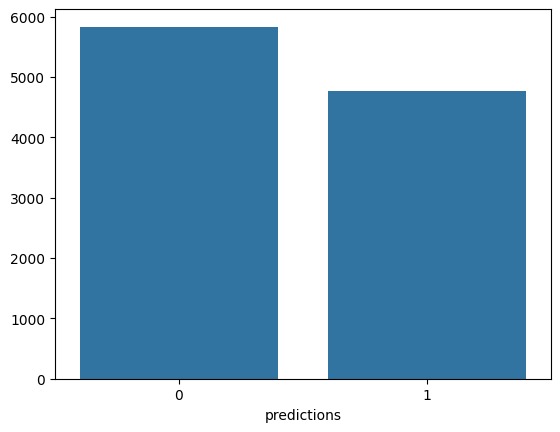

In [ ]:
import seaborn as sns
result = df.groupby(['predictions']).size()
sns.barplot(x = result.index, y = result.values)

In [ ]:
import pandas as pd

# Memotong string di kolom 'timestamp' hingga karakter ke-10
df['created_at'] = df['created_at'].str[:10]

# Hapus baris dengan tanggal yang error (NaT)
df = df.dropna(subset=['created_at'])

# Kelompokkan data berdasarkan tanggal, hitung agregasi tambahan
daily_grouped_2021 = df.groupby('created_at').agg(
    count=('created_at', 'size'),
    avg_prediction_prob=('predictions_prob', 'mean'),
    avg_predictions_result=('predictions', 'mean')
).reset_index()


**Agregasi data**

In [ ]:
df = daily_grouped_2021
# Mengubah kolom created_at menjadi format datetime

df['created_at'] = df['created_at'] + ' 2024'
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %Y')

# Mengurutkan berdasarkan kolom created_at dari yang terkecil
df = df.sort_values(by='created_at', ascending=True)

print(df)


   created_at  count  avg_prediction_prob  avg_predictions_result
13 2024-04-01    104             0.435028                0.432692
66 2024-04-02    105             0.470768                0.485714
79 2024-04-03    123             0.484478                0.504065
53 2024-04-04    116             0.533202                0.586207
0  2024-04-05    119             0.404585                0.394958
..        ...    ...                  ...                     ...
60 2024-06-27    125             0.447938                0.440000
7  2024-06-28    131             0.454546                0.458015
35 2024-06-29    110             0.405039                0.418182
48 2024-06-30    102             0.514803                0.519608
18 2024-07-01    135             0.436861                0.451852

[92 rows x 4 columns]


In [ ]:
pip install pycoingecko

In [ ]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import time

# Inisialisasi API Coingecko
cg = CoinGeckoAPI()

# Menentukan rentang waktu (timestamp Unix)
start_date = int(time.mktime(time.strptime('2024-04-01', '%Y-%m-%d')))
end_date = int(time.mktime(time.strptime('2024-07-01', '%Y-%m-%d')))

# Mendapatkan data historis Bitcoin (harga dalam USD)
data = cg.get_coin_market_chart_range_by_id(
    id='bitcoin',
    vs_currency='usd',
    from_timestamp=start_date,
    to_timestamp=end_date
)

# Ekstrak data harga dan ubah ke DataFrame
prices = data['prices']
harga = pd.DataFrame(prices, columns=['timestamp', 'price'])
harga['timestamp'] = pd.to_datetime(harga['timestamp'], unit='ms')

# Ambil harga penutupan dengan memilih harga yang terakhir dalam setiap hari
harga['date'] = harga['timestamp'].dt.date
harga = harga.groupby('date').last().reset_index()  # Mengambil harga terakhir (penutupan) setiap hari


In [ ]:
kolom = ["timestamp",'price']
harga = harga[kolom]

In [ ]:
harga['timestamp'] = pd.to_datetime(harga['timestamp'])

# Hitung selisih harga dengan harga sehari sebelumnya
harga['volatility'] = harga['price'] - harga['price'].shift(1)


In [ ]:
print(harga.columns)
print(df.columns)


Index(['timestamp', 'price', 'volatility'], dtype='object')
Index(['created_at', 'count', 'avg_prediction_prob', 'avg_predictions_result'], dtype='object')


In [ ]:
harga.rename(columns={"timestamp": "created_at"}, inplace=True)

In [ ]:
# Gabungkan DataFrame
combined_df = pd.merge(harga, df, on="created_at", how="outer")
combined_df['binary_volatility'] = combined_df['volatility'].apply(lambda x: 1 if x > 0 else 0)
combined_df['binary_predictions_result'] = combined_df['avg_predictions_result'].apply(lambda x: 1 if x > 0.5 else 0)
print(combined_df)

   created_at         price   volatility  count  avg_prediction_prob  avg_predictions_result  binary_volatility  binary_predictions_result
0  2024-04-01  71246.951441          NaN    104             0.435028                0.432692                  0                          0
1  2024-04-02  69785.925038 -1461.026403    105             0.470768                0.485714                  0                          0
2  2024-04-03  65440.419226 -4345.505812    123             0.484478                0.504065                  0                          1
3  2024-04-04  66123.938539   683.519313    116             0.533202                0.586207                  1                          1
4  2024-04-05  68542.177153  2418.238614    119             0.404585                0.394958                  1                          0
..        ...           ...          ...    ...                  ...                     ...                ...                        ...
87 2024-06-27  60749.896194

In [ ]:
combined_df['volatility']=np.where(harga['created_at']=='2024-04-01',0 - 1663,harga['volatility'])

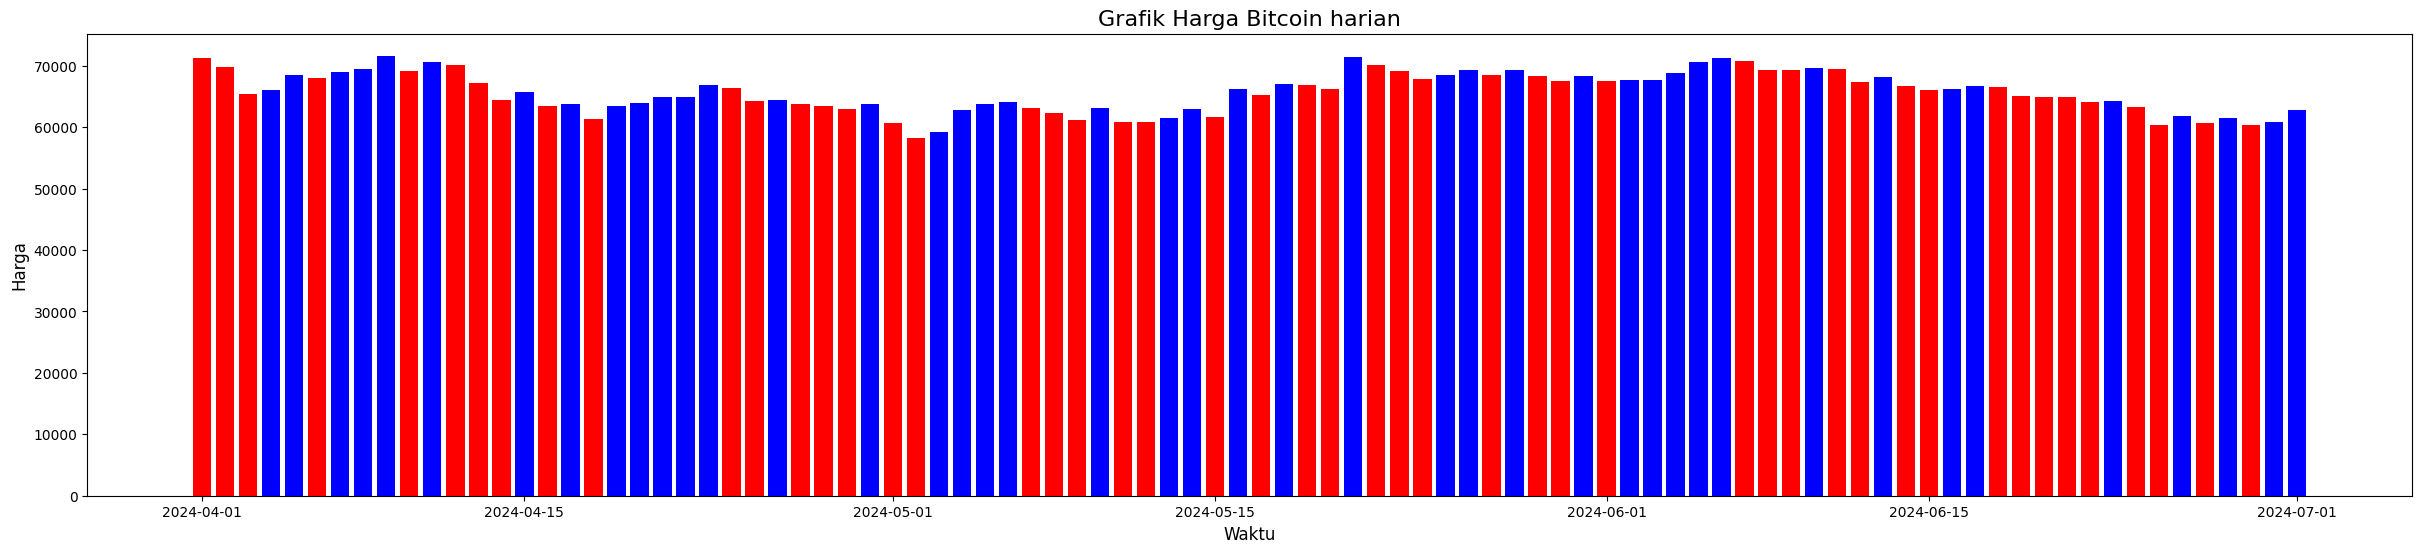

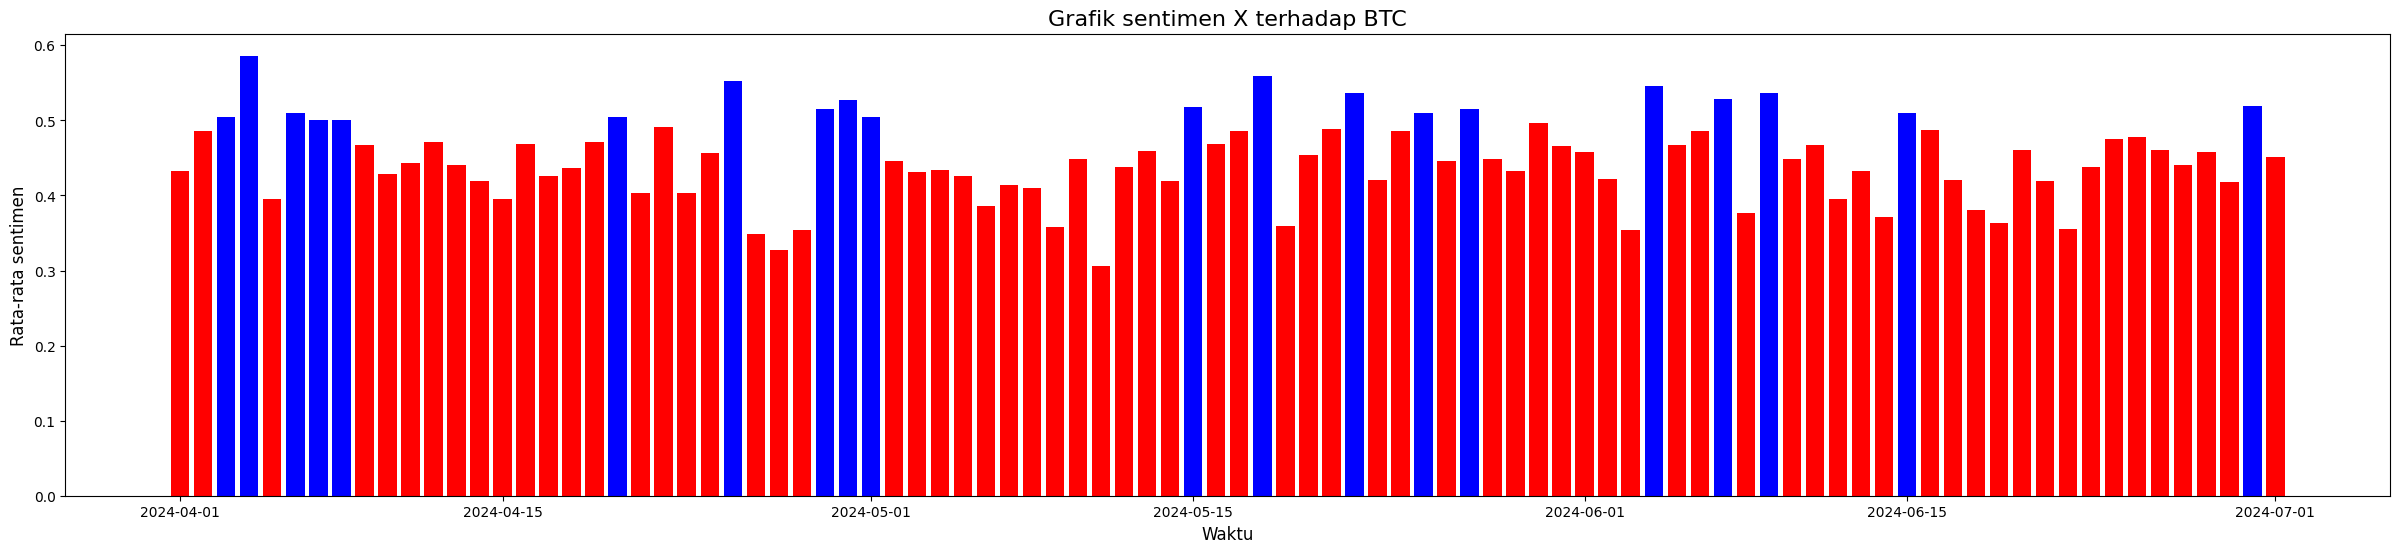

In [ ]:
# Membuat grafik batang dengan pewarnaan kondisional
plt.figure(figsize=(30, 6))

# Loop untuk menggambar batang dengan warna kondisional
for i in range(len(combined_df)):
    color = 'red' if combined_df['volatility'][i] < 0 else 'blue'
    plt.bar(combined_df['created_at'][i], combined_df['price'][i], color=color)

# Menambahkan judul dan label
plt.title('Grafik Harga Bitcoin harian', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Harga', fontsize=12)

# Tampilkan grafik
plt.show()

# Membuat grafik batang dengan pewarnaan kondisional
plt.figure(figsize=(30, 6))

# Loop untuk menggambar batang dengan warna kondisional
for i in range(len(combined_df)):
    color = 'red' if combined_df['avg_predictions_result'][i] < 0.5 else 'blue'
    plt.bar(combined_df['created_at'][i], combined_df['avg_predictions_result'][i], color=color)

# Menambahkan judul dan label
plt.title('Grafik sentimen X terhadap BTC', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Rata-rata sentimen', fontsize=12)

# Tampilkan grafik
plt.show()

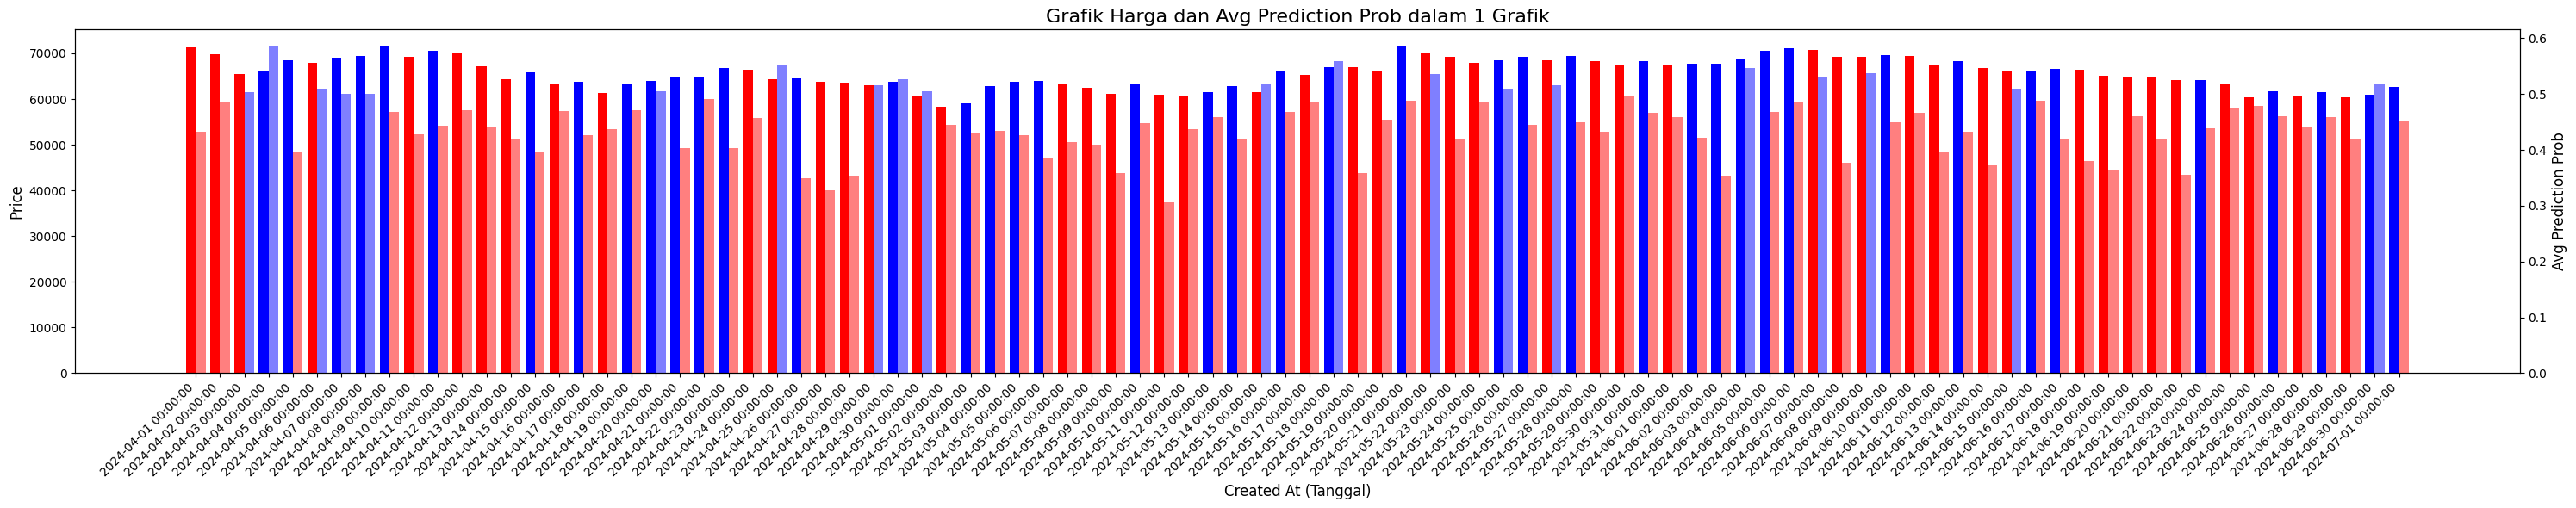

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat figure dengan ukuran
plt.figure(figsize=(30, 6))

# Tentukan posisi batang agar tidak bertumpukan
bar_width = 0.4
index = np.arange(len(combined_df))

# Membuat sumbu y pertama untuk harga
ax1 = plt.gca()

# Loop untuk menggambar batang harga dengan warna kondisional
for i in range(len(combined_df)):
    color = 'red' if combined_df['volatility'][i] < 0 else 'blue'
    ax1.bar(index[i] - bar_width / 2, combined_df['price'][i], color=color, width=bar_width, label='Price')

# Menambahkan label dan judul untuk sumbu y pertama
ax1.set_xlabel('Created At (Tanggal)', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)
ax1.set_title('Grafik Harga dan Avg Prediction Prob dalam 1 Grafik', fontsize=16)

# Membuat sumbu y kedua untuk rata-rata probabilitas
ax2 = ax1.twinx()

# Loop untuk menggambar batang avg_prediction_prob dengan warna kondisional
for i in range(len(combined_df)):
    color = 'red' if combined_df['avg_predictions_result'][i] < 0.50 else 'blue'
    ax2.bar(index[i] + bar_width / 2, combined_df['avg_predictions_result'][i], color=color, width=bar_width, alpha=0.5, label='Avg Prediction Prob')

# Menambahkan label untuk sumbu y kedua
ax2.set_ylabel('Avg Prediction Prob', fontsize=12)

# Mengatur label x-axis agar terlihat jelas
ax1.set_xticks(index)
ax1.set_xticklabels(combined_df['created_at'], rotation=45, ha='right')

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/SKRIPSI/Final/rata-rata_sentimen_harian.csv', index=False)

In [ ]:
combined_df = pd.read_csv("/content/drive/MyDrive/SKRIPSI/rata-rata_sentimen_harian.csv", encoding='latin-1')

In [ ]:
combined_df['price_lag1'] = combined_df['price'].shift(-1)
combined_df['volatility_lag1'] = combined_df['volatility'].shift(-1)

In [ ]:
print(combined_df)

   created_at         price   volatility  count  avg_prediction_prob  avg_predictions_result  binary_volatility  binary_predictions_result    price_lag1  volatility_lag1
0  2024-04-01  71246.951441 -1663.000000    104             0.435028                0.432692                  0                          0  69785.925038     -1461.026403
1  2024-04-02  69785.925038 -1461.026403    105             0.470768                0.485714                  0                          0  65440.419226     -4345.505812
2  2024-04-03  65440.419226 -4345.505812    123             0.484478                0.504065                  0                          1  66123.938539       683.519313
3  2024-04-04  66123.938539   683.519313    116             0.533202                0.586207                  1                          1  68542.177153      2418.238614
4  2024-04-05  68542.177153  2418.238614    119             0.404585                0.394958                  1                          0  67978.6102

In [ ]:
df = combined_df
combined_df = combined_df.iloc[:30]


In [ ]:
combined_df = df

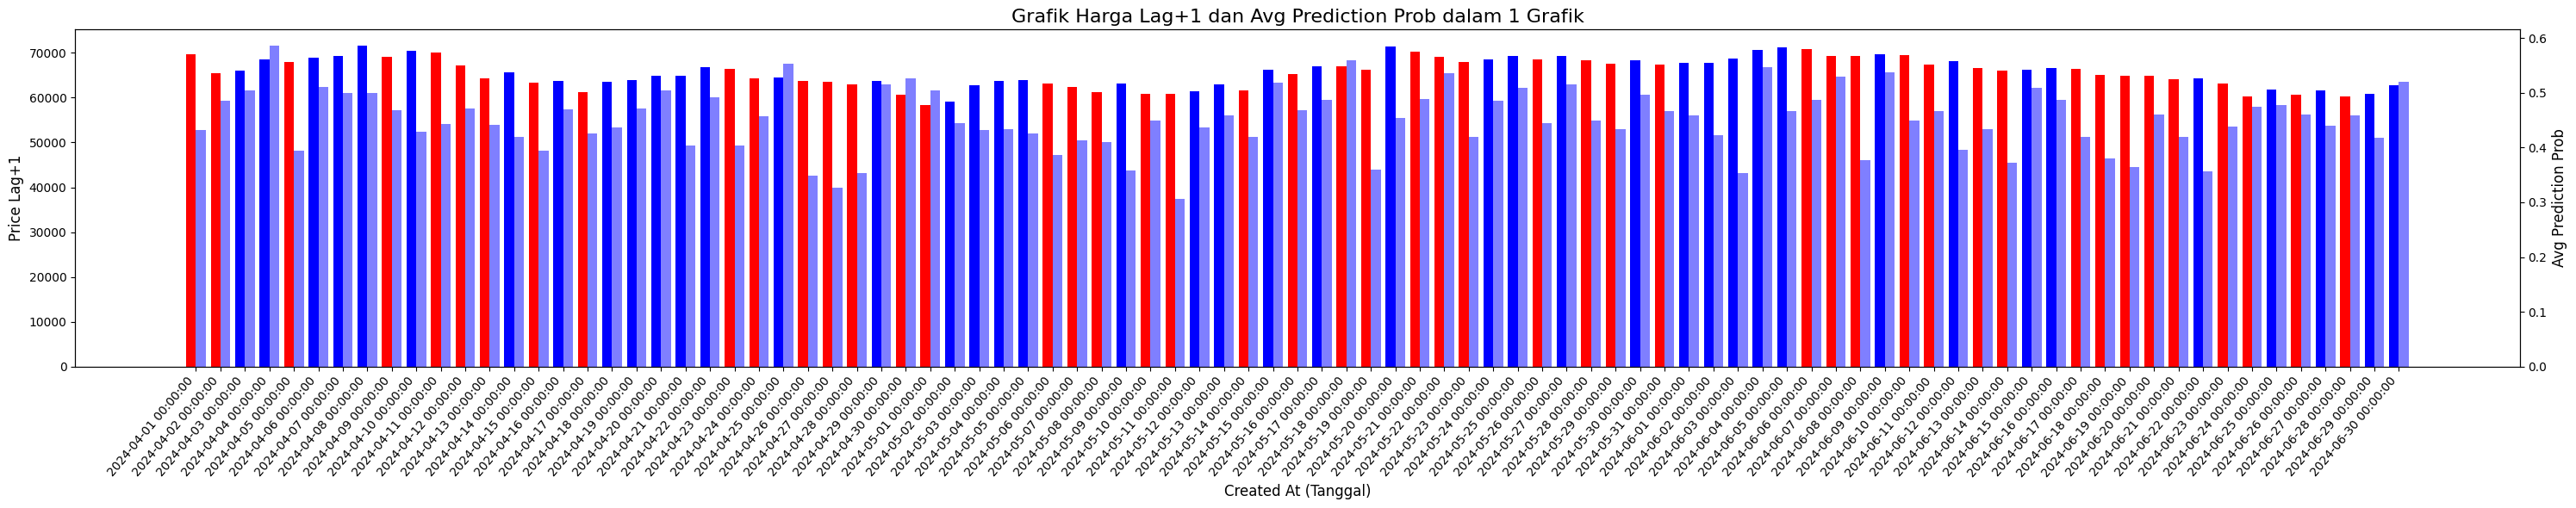

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tambahkan kolom lag untuk price+1
# combined_df['price_lag1'] = combined_df['price'].shift(-1)

# Hapus baris dengan NaN karena lagging
combined_df = combined_df.dropna(subset=['price_lag1'])

# Membuat figure dengan ukuran
plt.figure(figsize=(30, 6))

# Tentukan posisi batang agar tidak bertumpukan
bar_width = 0.4
index = np.arange(len(combined_df))

# Membuat sumbu y pertama untuk harga lag
ax1 = plt.gca()

# Loop untuk menggambar batang harga lag dengan warna kondisional
for i in range(len(combined_df)):
    color = 'red' if combined_df['volatility_lag1'][i] < 0 else 'blue'
    ax1.bar(index[i] - bar_width / 2, combined_df['price_lag1'].iloc[i], color=color, width=bar_width, label='Price Lag+1')

# Menambahkan label dan judul untuk sumbu y pertama
ax1.set_xlabel('Created At (Tanggal)', fontsize=12)
ax1.set_ylabel('Price Lag+1', fontsize=12)
ax1.set_title('Grafik Harga Lag+1 dan Avg Prediction Prob dalam 1 Grafik', fontsize=16)

# Membuat sumbu y kedua untuk rata-rata probabilitas
ax2 = ax1.twinx()

# Loop untuk menggambar batang avg_prediction_prob dengan warna kondisional
for i in range(len(combined_df)):
    color = (
    'blue' if combined_df['avg_predictions_result'].iloc[i] >= 0.45
    else 'red' if combined_df['avg_predictions_result'].iloc[i] <= 0.45
    else 'yellow'
    )
    ax2.bar(index[i] + bar_width / 2, combined_df['avg_predictions_result'].iloc[i], color=color, width=bar_width, alpha=0.5, label='Avg Prediction Prob')

# Menambahkan label untuk sumbu y kedua
ax2.set_ylabel('Avg Prediction Prob', fontsize=12)

# Mengatur label x-axis agar terlihat jelas
ax1.set_xticks(index)
ax1.set_xticklabels(combined_df['created_at'], rotation=50, ha='right')

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [ ]:
positive_volatility = combined_df[combined_df['volatility'] > 0]  # Volatilitas positif
negative_volatility = combined_df[combined_df['volatility'] < 0]  # Volatilitas negatif

In [ ]:

positive_volatility['avg_prediction_prob'] = round(positive_volatility['avg_prediction_prob'], 2)
negative_volatility['avg_prediction_prob'] = round(negative_volatility['avg_prediction_prob'], 2)



<ipython-input-50-043b22f29d22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_volatility['avg_prediction_prob'] = round(positive_volatility['avg_prediction_prob'], 2)
<ipython-input-50-043b22f29d22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_volatility['avg_prediction_prob'] = round(negative_volatility['avg_prediction_prob'], 2)


In [ ]:
avg_prob_pos = positive_volatility['avg_prediction_prob'].mean()
avg_result_pos = positive_volatility['avg_predictions_result'].mean()
avg_prob_neg = negative_volatility['avg_prediction_prob'].mean()
avg_result_neg = negative_volatility['avg_predictions_result'].mean()

In [ ]:
print(f"Rata-rata probabilitas dengan volatilitas positif: {avg_prob_pos}")
print(f"Rata-rata hasil dengan volatilitas positif: {avg_result_pos}")
print(f"Rata-rata probabilitas dengan volatilitas negatif: {avg_prob_neg}")
print(f"Rata-rata hasil dengan volatilitas negatif: {avg_result_neg}")

Rata-rata probabilitas dengan volatilitas positif: 0.4447619616985321
Rata-rata hasil dengan volatilitas positif: 0.45703217747408126
Rata-rata probabilitas dengan volatilitas negatif: 0.43408164381980896
Rata-rata hasil dengan volatilitas negatif: 0.44534035674461525


In [ ]:
print((0.45703217747408126+0.44534035674461525)/2)

0.4511862671093483


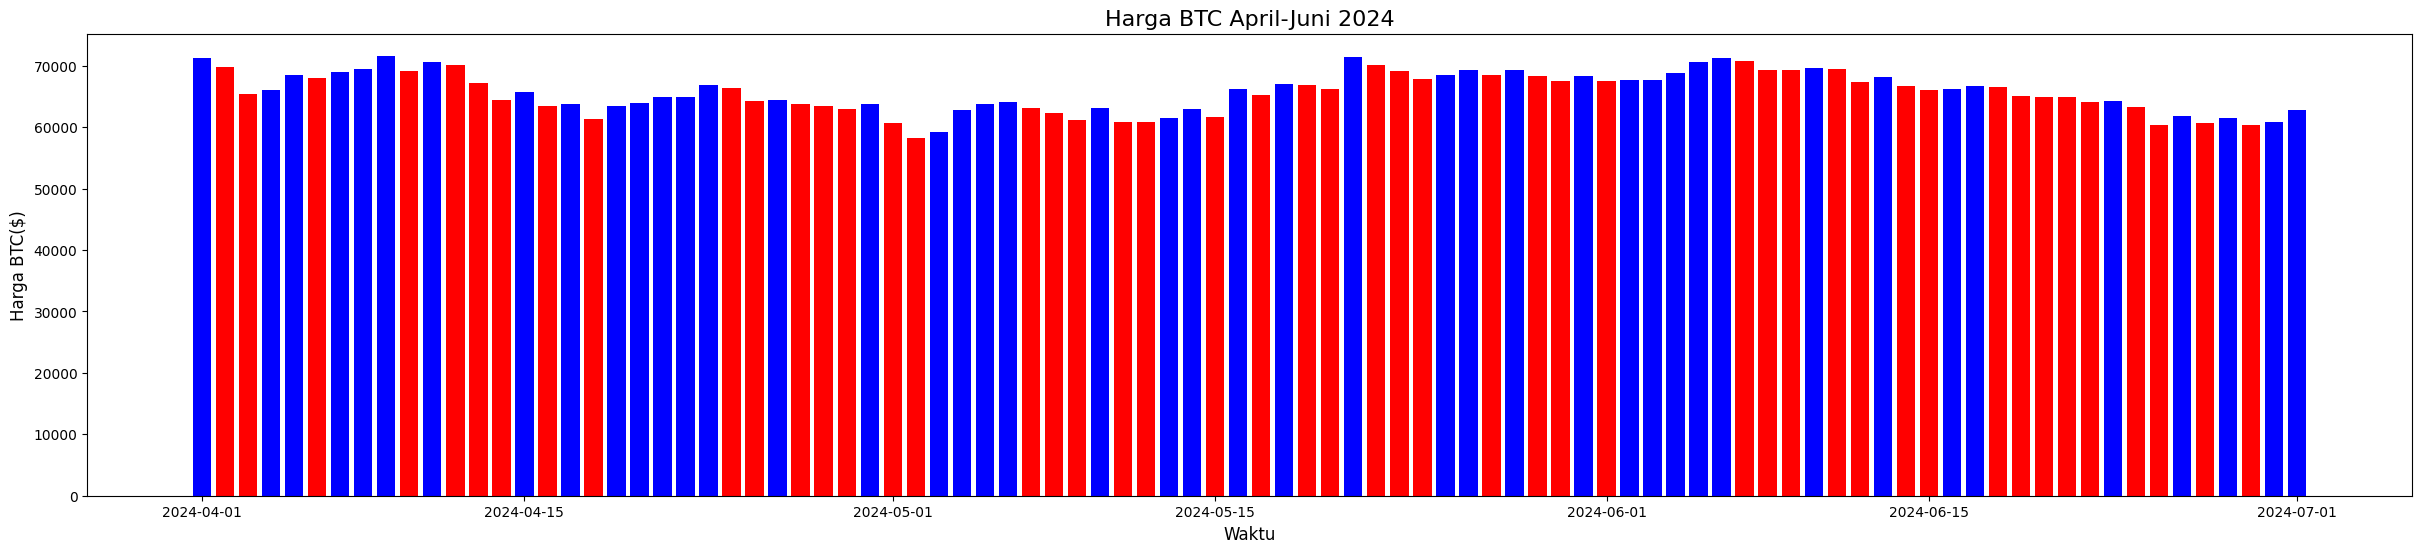

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Membuat grafik batang dengan pewarnaan kondisional
plt.figure(figsize=(30, 6))

# Loop untuk menggambar batang dengan warna kondisional
for i in range(len(harga)):
    color = 'red' if harga['price'].iloc[i] < harga['price'].iloc[i-1] else 'blue'
    plt.bar(harga['timestamp'][i], harga['price'][i], color=color)

# Menambahkan judul dan label
plt.title('Harga BTC April-Juni 2024', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Harga BTC($)', fontsize=12)

# Tampilkan grafik
plt.show()